# Исследование объявлений о продаже квартир

## Общее описание проекта 
В распоряжении данные сервиса о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно изучить влияние различных факторов на рыночную стоимость объектов недвижимости. 

## Описание признакового пространства 
По каждой квартире на продажу доступны следующие признаки. 

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition| сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total| всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Инструкции по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Предобработка данных
- Обработать аномальные наблюдения;
- Привести данные к необходимым типам;
- Исследовать дублирующиеся записи;
- Обработать пропущенные значения.

Шаг 3. Посчитайте и добавьте в таблицу:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). 
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Шаг 5. Проверьте гипотезы о равенстве стоимости квартир в центральной части Санкт-Петербурге и других квартир.

In [ ]:
#Ваш код здесь

1. Работа с типами

---


2. Работа с дублирующимися записями

---


3. Работа с аномалиями

---


4. Пропуски



In [1]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv('project7.csv', sep='\t')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [11]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
df.describe(include='object')

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


In [14]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [15]:
np.round(df.describe(),2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [17]:
pd.set_option('display.float_format', '{:.3f}'.format)


In [19]:

new_perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles=new_perc)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
1%,0.000,1000000.000,25.199,1.000,2.500,2.000,13.000,1.000,5.000,0.000,9412.560,1326.580,0.000,24.000,0.000,35.090,4.000
5%,1.000,1870000.000,31.000,1.000,2.500,4.000,15.200,1.000,5.500,0.000,11557.400,3541.000,0.000,95.900,0.000,93.000,9.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
95%,20.000,15300000.000,116.000,4.000,3.300,25.000,69.000,16.000,20.000,2.000,51340.000,31671.600,2.000,968.000,3.000,976.550,647.000


In [22]:
df.astype({'balcony':'int64'}, errors = 'ignore').dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [25]:
df.duplicated().index #удаление дублей

RangeIndex(start=0, stop=23699, step=1)

In [27]:
df.drop_duplicates(inplace = True)

In [28]:
df.balcony.unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

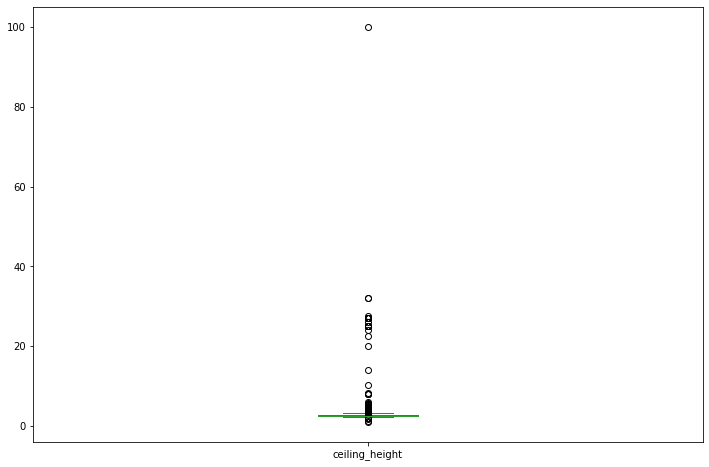

In [30]:
#boxplot
df.plot(kind = 'box', 
        y = 'ceiling_height',
        figsize = (12,8));

In [37]:
df[(df.ceiling_height < 2.5) |
   (df.ceiling_height > 3.8329700)].shape[0]/df.shape[0]*100

0.9198700367104098

In [38]:
df1 = df[(df.ceiling_height > 2.5) &
         (df.ceiling_height < 3.8329700)]

In [41]:
df2 = df[(df.ceiling_height > 2.5)]

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          10916 non-null  int64  
 1   last_price            10916 non-null  float64
 2   total_area            10916 non-null  float64
 3   first_day_exposition  10916 non-null  object 
 4   rooms                 10916 non-null  int64  
 5   ceiling_height        10916 non-null  float64
 6   floors_total          10907 non-null  float64
 7   living_area           10335 non-null  float64
 8   floor                 10916 non-null  int64  
 9   is_apartment          1549 non-null   object 
 10  studio                10916 non-null  bool   
 11  open_plan             10916 non-null  bool   
 12  kitchen_area          10198 non-null  float64
 13  balcony               5690 non-null   float64
 14  locality_name         10902 non-null  object 
 15  airports_nearest   

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10771 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          10771 non-null  int64  
 1   last_price            10771 non-null  float64
 2   total_area            10771 non-null  float64
 3   first_day_exposition  10771 non-null  object 
 4   rooms                 10771 non-null  int64  
 5   ceiling_height        10771 non-null  float64
 6   floors_total          10762 non-null  float64
 7   living_area           10198 non-null  float64
 8   floor                 10771 non-null  int64  
 9   is_apartment          1516 non-null   object 
 10  studio                10771 non-null  bool   
 11  open_plan             10771 non-null  bool   
 12  kitchen_area          10069 non-null  float64
 13  balcony               5626 non-null   float64
 14  locality_name         10758 non-null  object 
 15  airports_nearest   

In [48]:
df2.ceiling_height.notnull()

0        True
4        True
10       True
13       True
16       True
         ... 
23689    True
23691    True
23693    True
23694    True
23697    True
Name: ceiling_height, Length: 10916, dtype: bool

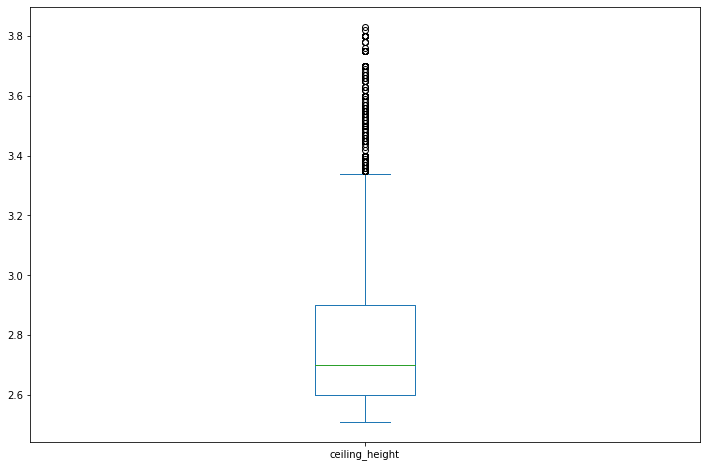

In [39]:
#boxplot
df1.plot(kind = 'box', 
        y = 'ceiling_height',
        figsize = (12,8));

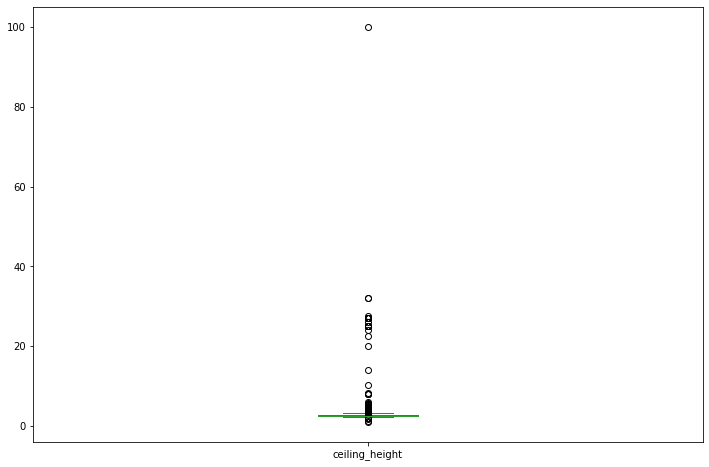

In [32]:
#boxplot
df.plot(kind = 'box', 
        y = 'ceiling_height',
        figsize = (12,8));

In [33]:
# np.percentile(df.ceiling_height, 1)

nan

In [ ]:
# df[(df.ceiling_height >= 2.5) & (df.ceiling_height <= 3.83) | (df.ceiling_height == np.NaN)] ничего не убрала с датофрейма
